In [352]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [353]:
df=pd.read_csv("Food_Delivery_Time_Prediction.csv")

In [354]:
print("Missing Values:", df.isnull().sum())

Missing Values: Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [355]:
df.dropna(inplace=True)

In [356]:
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']

In [357]:
le = LabelEncoder();
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [358]:
scaler = StandardScaler()
numeric_cols = ['Distance', 'Delivery_Time', 'Order_Cost']

In [359]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [360]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,4,Medium,Afternoon,2,4.1,3.0,-1.487932,0.501852,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,8,Low,Night,2,4.5,4.2,-0.264987,-1.634294,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,9,High,Night,1,3.3,3.4,-0.741529,1.092646,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,2,Medium,Evening,1,3.2,3.7,1.382411,-0.923323,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,6,Low,Night,1,3.5,2.8,-1.280915,-0.779755,2.34


In [361]:
# describe
print(df.describe())

           Distance  Weather_Conditions  Traffic_Conditions  \
count  2.000000e+02          200.000000          200.000000   
mean  -1.643130e-16            1.560000            1.085000   
std    1.002509e+00            1.096546            0.768589   
min   -1.608593e+00            0.000000            0.000000   
25%   -7.924313e-01            1.000000            0.000000   
50%   -1.806765e-01            2.000000            1.000000   
75%    7.325599e-01            3.000000            2.000000   
max    1.963762e+00            3.000000            2.000000   

       Delivery_Person_Experience  Vehicle_Type  Restaurant_Rating  \
count                  200.000000    200.000000         200.000000   
mean                     5.250000      0.965000           3.738500   
std                      2.745027      0.810593           0.703021   
min                      1.000000      0.000000           2.500000   
25%                      3.000000      0.000000           3.200000   
50%         

In [362]:
# mean
print(df.mean(numeric_only=True))

Distance                     -1.643130e-16
Weather_Conditions            1.560000e+00
Traffic_Conditions            1.085000e+00
Delivery_Person_Experience    5.250000e+00
Vehicle_Type                  9.650000e-01
Restaurant_Rating             3.738500e+00
Customer_Rating               3.686500e+00
Delivery_Time                 3.730349e-16
Order_Cost                   -2.042810e-16
Tip_Amount                    4.661665e+01
dtype: float64


In [363]:
# median
print(df.median(numeric_only=True))

Distance                      -0.180676
Weather_Conditions             2.000000
Traffic_Conditions             1.000000
Delivery_Person_Experience     5.000000
Vehicle_Type                   1.000000
Restaurant_Rating              3.800000
Customer_Rating                3.700000
Delivery_Time                  0.076625
Order_Cost                    -0.019259
Tip_Amount                    47.530000
dtype: float64


In [364]:
# mode
print(df.mode(numeric_only=True).iloc[0])


Distance                     -1.491370
Weather_Conditions            1.000000
Traffic_Conditions            1.000000
Delivery_Person_Experience    8.000000
Vehicle_Type                  0.000000
Restaurant_Rating             3.800000
Customer_Rating               2.600000
Delivery_Time                -0.122831
Order_Cost                    1.401256
Tip_Amount                    2.220000
Name: 0, dtype: float64


In [365]:
# variance
print(df.var(numeric_only=True))

Distance                        1.005025
Weather_Conditions              1.202412
Traffic_Conditions              0.590729
Delivery_Person_Experience      7.535176
Vehicle_Type                    0.657060
Restaurant_Rating               0.494239
Customer_Rating                 0.485897
Delivery_Time                   1.005025
Order_Cost                      1.005025
Tip_Amount                    862.109808
dtype: float64


In [366]:
correlation_matrix = df.corr(numeric_only=True)

In [367]:
print("Correlation With Delivery Time:-\n")
print(correlation_matrix["Delivery_Time"].sort_values(ascending=False))

Correlation With Delivery Time:-

Delivery_Time                 1.000000
Traffic_Conditions            0.040023
Order_Cost                   -0.009307
Delivery_Person_Experience   -0.019098
Weather_Conditions           -0.021580
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
Vehicle_Type                 -0.055576
Distance                     -0.075143
Restaurant_Rating            -0.091855
Name: Delivery_Time, dtype: float64


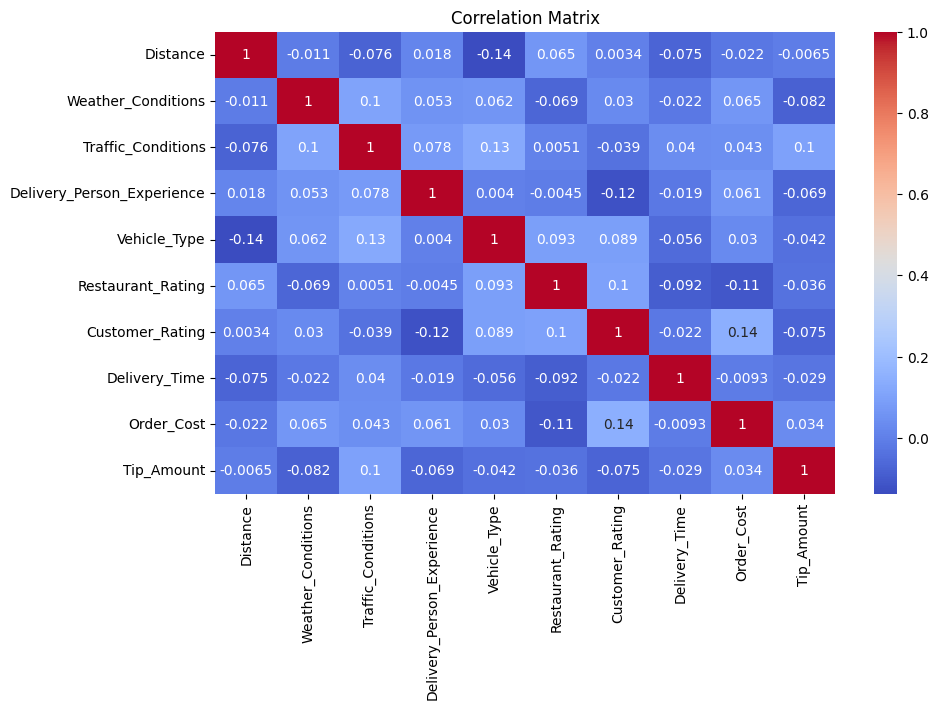

In [368]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

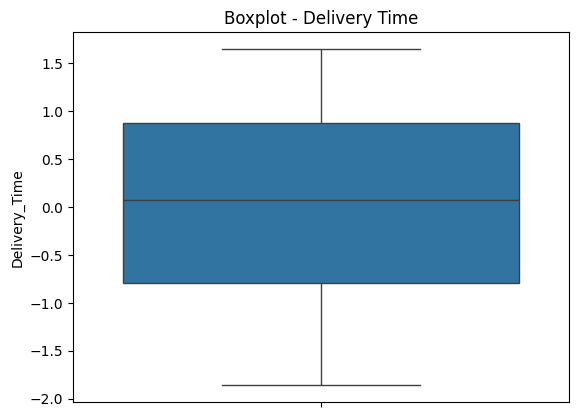

In [369]:
sns.boxplot(y=df['Delivery_Time'])
plt.title("Boxplot - Delivery Time")
plt.show()

In [370]:
# rush hour
def is_rush_time(time):
    if time in ['Evening', 'Afternoon']:
        return 1  # Rush Hour
    else:
        return 0  # Non-Rush

df['Rush_Hour'] = df['Order_Time'].apply(is_rush_time)
df['Rush_Hour']

0      1
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    0
199    0
Name: Rush_Hour, Length: 200, dtype: int64

In [371]:
X = df[["Distance", "Traffic_Conditions", "Order_Priority"]] 
y = df["Delivery_Time"] 

In [372]:
X = pd.get_dummies(X, drop_first=True)

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [374]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [375]:
y_pred = model.predict(X_test)

In [376]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [377]:
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Linear Regression Results:
Mean Squared Error (MSE): 0.93
R-squared (R²): -0.018
Mean Absolute Error (MAE): 0.77


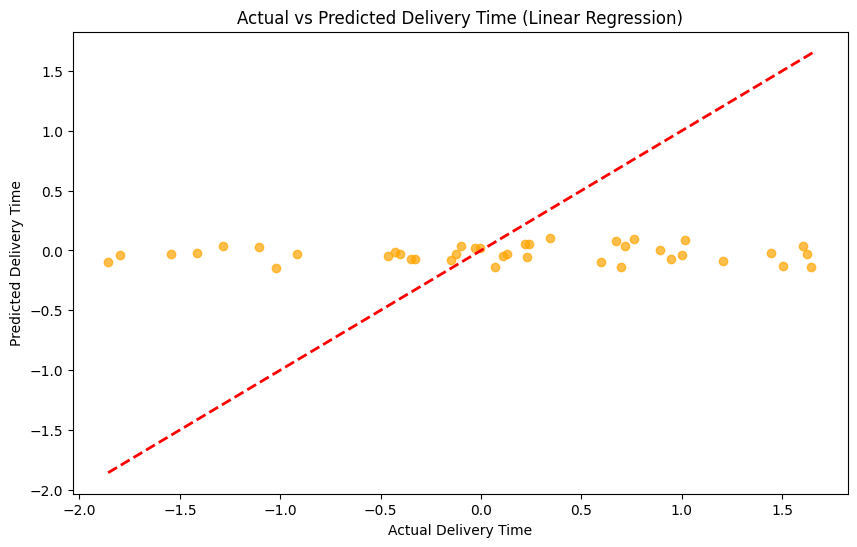

In [378]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time (Linear Regression)")
plt.show()

In [379]:
average_time = df["Delivery_Time"].mean()
df["Status"] = df["Delivery_Time"].apply(lambda x: 1 if x > average_time else 0)


In [380]:
X = df[["Traffic_Conditions", "Weather_Conditions", "Delivery_Person_Experience"]]
y = df["Status"]

In [381]:
X = pd.get_dummies(X)

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [384]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [385]:
y_pred = model.predict(X_test)

In [386]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [387]:
print("Logistic Regression Classification Results:")
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")

Logistic Regression Classification Results:
Accuracy:  0.42
Precision: 0.48
Recall:    0.64
F1-score:  0.55


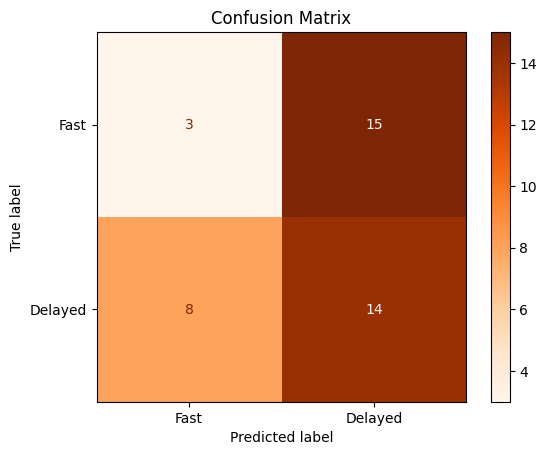

In [388]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fast", "Delayed"])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

In [389]:
y_probs = model.predict_proba(X_test)[:, 1]

In [390]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

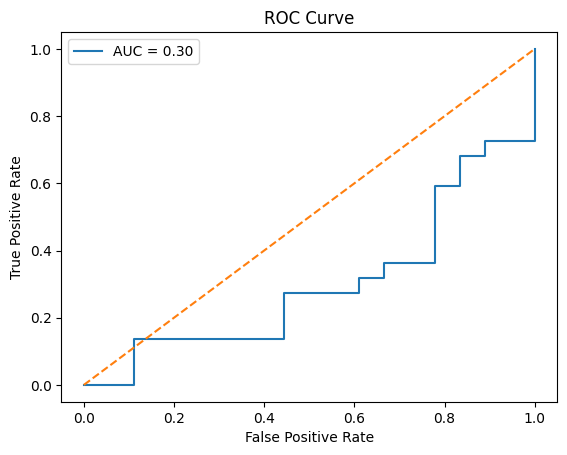

In [391]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()